In [169]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data (2).csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,temperature,pulse_rate
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,44,154
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,41,83
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,41,81
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,43,72
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,44,103


In [171]:
df.shape

(5110, 14)

In [172]:
# df.drop(['id'],axis='columns')
df.drop(['id'],axis='columns',inplace=True)
df.drop(['ever_married'],axis='columns',inplace=True)
df.drop(['Residence_type'],axis='columns',inplace=True)
df.drop(['work_type'], axis = 'columns', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,temperature,pulse_rate
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1,44,154
1,Female,61.0,0,0,202.21,NaN,never smoked,1,41,83
2,Male,80.0,0,1,105.92,32.5,never smoked,1,41,81
3,Female,49.0,0,0,171.23,34.4,smokes,1,43,72
4,Female,79.0,1,0,174.12,24.0,never smoked,1,44,103


In [173]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
temperature            0
pulse_rate             0
dtype: int64

In [174]:
df['bmi'].dtype

dtype('float64')

In [175]:
df['bmi'].fillna(float(df['bmi'].mean()), inplace = True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
temperature          0
pulse_rate           0
dtype: int64

In [155]:
# temp = random.randint(40,45, size=5110)
# temperature = temp
# df["temperature"] = temp
# df.head()

In [156]:
# pulse = random.randint(60,160, size = 5110)
# df['pulse_rate'] = pulse
# df.head()

In [176]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

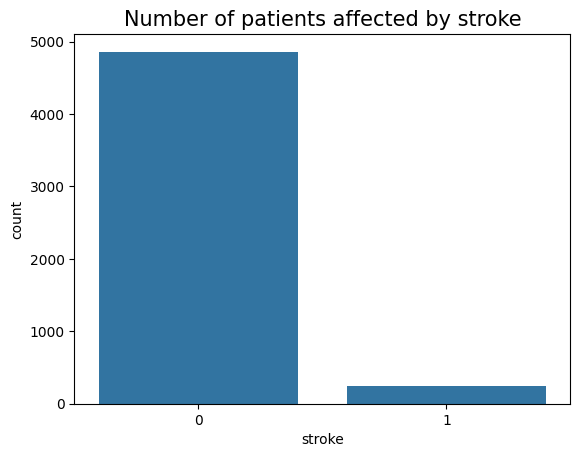

In [177]:
sns.countplot(x = df['stroke'])
plt.title('Number of patients affected by stroke', fontsize = 15)
plt.show()

In [178]:
df.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

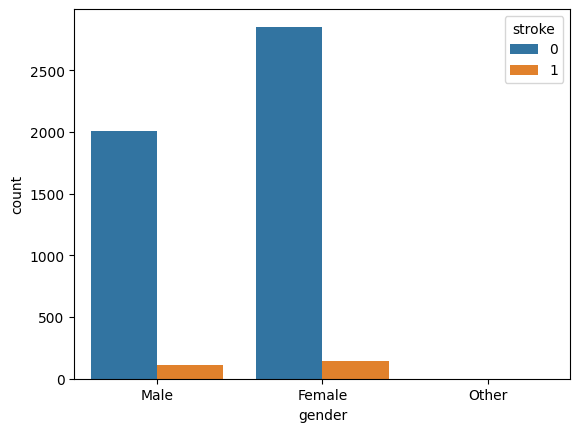

In [179]:
sns.countplot(x = df['gender'], hue = df['stroke'])
plt.show()

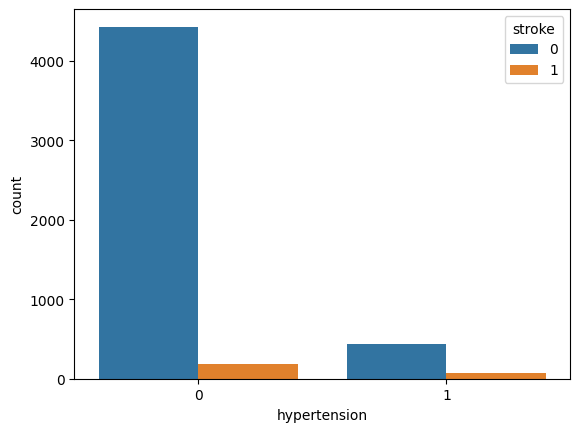

In [180]:
sns.countplot(x = df['hypertension'], hue = df['stroke'])
plt.show()

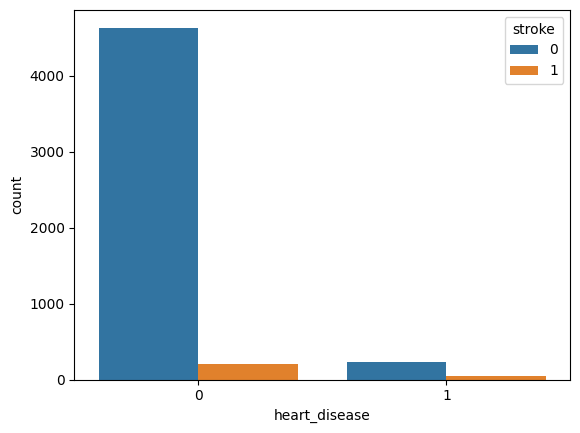

In [181]:
sns.countplot(x = df['heart_disease'], hue = df['stroke'])
plt.show()

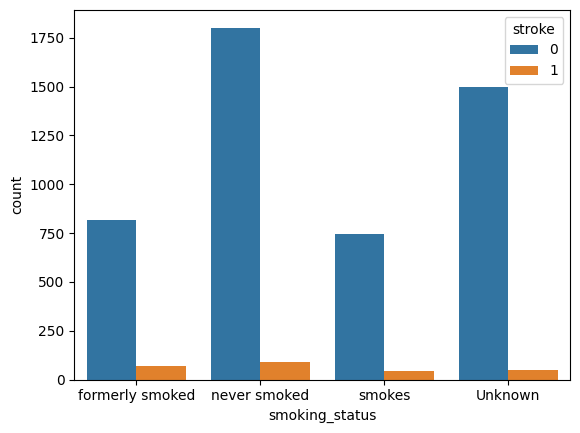

In [182]:
sns.countplot(x = df['smoking_status'], hue = df['stroke'])
plt.show()

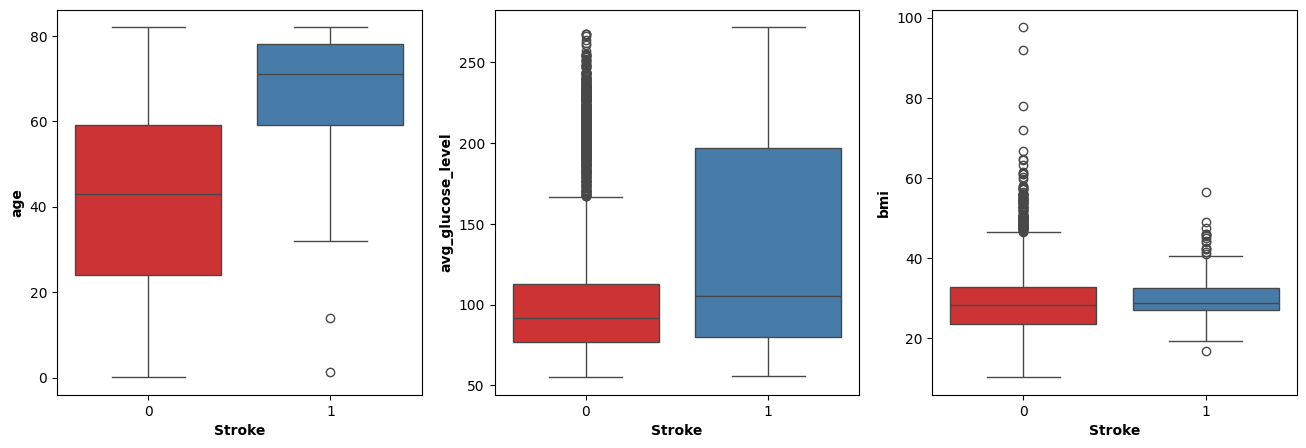

In [183]:
num_var = ['age','avg_glucose_level','bmi']
fig, axs = plt.subplots(1, 3, figsize = (16,5))
for i, col_name in enumerate(num_var):
  sns.boxplot(x = "stroke", y = col_name, data = df, ax = axs[i], palette = 'Set1')
  axs[i].set_xlabel('Stroke', weight = 'bold')
  axs[i].set_ylabel(f"{col_name}", weight = 'bold')

In [184]:
bmi_outliers = df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

Text(0.5, 1.0, 'Boxplot of BMI Distribution')

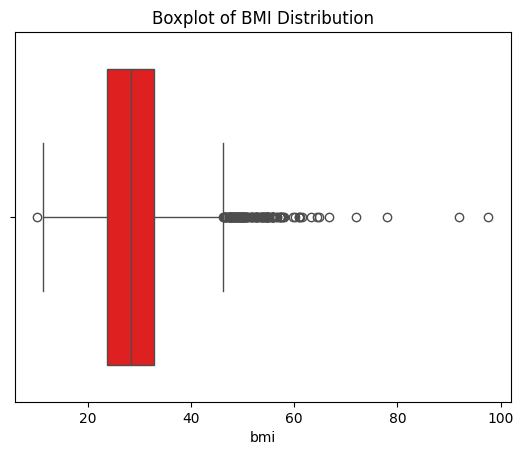

In [185]:
sns.boxplot(data = df, x = df['bmi'], color = 'red')
plt.title('Boxplot of BMI Distribution')

In [186]:
df['bmi'] = pd.to_numeric(df['bmi'])
df['bmi'] = df['bmi'].apply(lambda x: 50 if x>50 else x)

Text(0.5, 1.0, 'Boxplot of BMI Distribution')

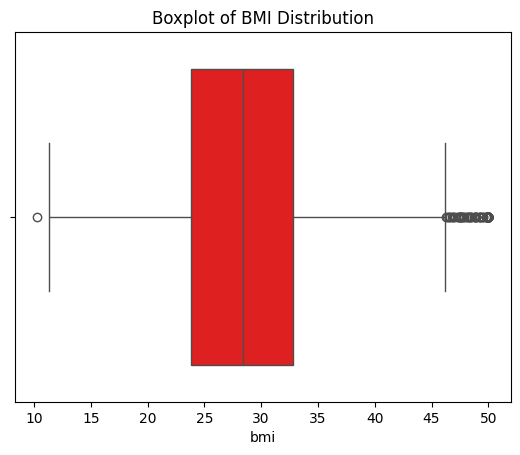

In [187]:
sns.boxplot(data = df, x = df['bmi'], color = 'red')
plt.title('Boxplot of BMI Distribution')

In [188]:
df=pd.get_dummies(df,["gender","smoking_status"])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,temperature,pulse_rate,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,44,154,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,41,83,1,0,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,41,81,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,43,72,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,44,103,1,0,0,0,0,1,0


In [189]:
df.drop(["gender_Female"], axis = 'columns', inplace = True)
df.drop(["smoking_status_Unknown"], axis = 'columns', inplace = True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,temperature,pulse_rate,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,44,154,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,41,83,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,41,81,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,43,72,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,44,103,0,0,0,1,0


In [ ]:
# df.drop('gender_Female',axis=1,inplace=True)
# df.drop('Work_Type_children',axis=1,inplace=True)
# df.drop('Smoking_Status_smokes',axis=1,inplace=True)
# df.head()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelEncoder = LabelEncoder()
# df['gender'] = labelEncoder.fit_transform(df['gender'])
# df['ever_married'] = labelEncoder.fit_transform(df['ever_married'])
# df['work_type'] = labelEncoder.fit_transform(df['work_type'])
# df['Residence_type'] = labelEncoder.fit_transform(df['Residence_type'])
# df['smoking_status'] = labelEncoder.fit_transform(df['smoking_status'])

Training the model using Decision Tree Classifier

In [190]:
model_1 = DecisionTreeClassifier()
# X = df[['age','hypertension','heart_disease','bmi','avg_glucose_level','gender_Male','gender_Other','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
X = df[['temperature','pulse_rate']]
Y = df['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
model_1.fit(X_train,y_train)
y_pred_1 = model_1.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred_1,y_test))
print("precision score is ",precision_score(y_pred_1,y_test))
print("recall score is ",recall_score(y_pred_1,y_test))
print("f1 score is ",f1_score(y_pred_1,y_test))

accuracy score is  0.9471624266144814
precision score is  0.0
recall score is  0.0
f1 score is  0.0


Training the model using Random Forest Classifier

In [191]:
model_2 = RandomForestClassifier()
# X = df[['age','hypertension','heart_disease','bmi','avg_glucose_level','gender_Male','gender_Other','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
X = df[['temperature','pulse_rate']]
Y = df['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred_2,y_test))
print("precision score is ",precision_score(y_pred_2,y_test))
print("recall score is ",recall_score(y_pred_2,y_test))
print("f1 score is ",f1_score(y_pred_2,y_test))

accuracy score is  0.9471624266144814
precision score is  0.0
recall score is  0.0
f1 score is  0.0


Training the model using Logistic Regression

In [192]:
model_3 = LogisticRegression()
# X = df[['age','hypertension','heart_disease','bmi','avg_glucose_level','gender_Male','gender_Other','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
X = df[['temperature','pulse_rate']]
Y = df['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
model_3.fit(X_train,y_train)
y_pred_3 = model_3.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred_3,y_test))
print("precision score is ",precision_score(y_pred_3,y_test))
print("recall score is ",recall_score(y_pred_3,y_test))
print("f1 score is ",f1_score(y_pred_3,y_test))

accuracy score is  0.9540117416829745
precision score is  0.0
recall score is  0.0
f1 score is  0.0


Training the model using Support Vector Machines

In [193]:
model_4 = SVC()
# X = df[['age','hypertension','heart_disease','bmi','avg_glucose_level','gender_Male','gender_Other','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
X = df[['temperature','pulse_rate']]
Y = df['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
model_4.fit(X_train,y_train)
y_pred_4 = model_4.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred_4,y_test))
print("precision score is ",precision_score(y_pred_4,y_test))
print("recall score is ",recall_score(y_pred_4,y_test))
print("f1 score is ",f1_score(y_pred_4,y_test))

accuracy score is  0.9540117416829745
precision score is  0.0
recall score is  0.0
f1 score is  0.0


In [115]:
# # X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
# print("accuracy score is ",accuracy_score(y_pred_,y_test))
# print("precision score is ",precision_score(y_pred,y_test))
# print("recall score is ",recall_score(y_pred,y_test))
# print("f1 score is ",f1_score(y_pred,y_test))

accuracy score is  0.9471624266144814
precision score is  0.0
recall score is  0.0
f1 score is  0.0


In [ ]:
# pulse_rate = int(input("Enter pulse rate"))
# temperature = int(input("Enter temperature"))
# test = [[temperature,pulse_rate]]
# prediction = model.predict(test)
# if (pulse_rate>160 or pulse_rate<60) and (temperature<40 or temperature>45):
#     print(1)
# prediction

In [194]:
# @title Input Features
pulse_rate = 178 # @param {type:"number"}
temperature = 47.786565 # @param {type:"number"}
test = [[temperature,pulse_rate]]
prediction_1 = model_1.predict(test)
prediction_2 = model_2.predict(test)
prediction_3 = model_3.predict(test)
prediction_4 = model_4.predict(test)
if (pulse_rate>160 or pulse_rate<60) and (temperature>40 or temperature<45):
  # if prediction == 0:
    print(prediction_1+1)
    print(prediction_2+1)
    print(prediction_3+1)
    print(prediction_4+1)

else:
  print(prediction_1)
  print(prediction_2)
  print(prediction_3)
  print(prediction_4)


[1]
[1]
[1]
[1]


1 - Person gets a stroke

0 - Person doesn't gets a stroke